# Fake News Detection - Data Exploration

## Objective
Explore and analyze the fake news dataset to understand its characteristics, quality, and prepare insights for preprocessing.

## Dataset Information
- **Source:** Fake.csv and True.csv
- **Task:** Binary classification (Fake vs Real news)
- **Features:** title, text, subject, date

## Sections
1. Data Loading & Preparation
2. Feature Engineering (word counts)
3. Data Quality Checks
4. Dataset Balance Analysis
5. Text Length Analysis
6. Key Findings & Recommendation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re

In [2]:
fake_df = pd.read_csv('Fake.csv')
true_df = pd.read_csv('True.csv')

In [3]:
fake_df.shape

(23481, 4)

In [4]:
fake_df.dtypes

title      object
text       object
subject    object
date       object
dtype: object

In [5]:
true_df.shape

(21417, 4)

In [6]:
true_df.dtypes

title      object
text       object
subject    object
date       object
dtype: object

In [7]:
fake_df['is_true'] = 0
true_df['is_true'] = 1

df = pd.concat([fake_df, true_df], ignore_index = True)
df.head()

title  \
0   Donald Trump Sends Out Embarrassing New Yearâ€™...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obamaâ€™s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text subject  \
0  Donald Trump just couldn t wish all Americans ...    News   
1  House Intelligence Committee Chairman Devin Nu...    News   
2  On Friday, it was revealed that former Milwauk...    News   
3  On Christmas day, Donald Trump announced that ...    News   
4  Pope Francis used his annual Christmas Day mes...    News   

                date  is_true  
0  December 31, 2017        0  
1  December 31, 2017        0  
2  December 30, 2017        0  
3  December 29, 2017        0  
4  December 25, 2017        0

## Data Preparation

### Dataset Structure
- Combined fake and real news into single dataframe
- Added binary label: `is_true` (0 = Fake, 1 = Real)
- Original columns: title, text, subject, data

### Next Steps
- Remove unecessary columns (subject, date)
- These columns won't be used for classification as they contain metadata rather than content

In [8]:
df['subject'].unique()

array(['News', 'politics', 'Government News', 'left-news', 'US_News',
       'Middle-east', 'politicsNews', 'worldnews'], dtype=object)

In [9]:
df = df.drop(['subject', 'date'], axis=1)
df.head()

title  \
0   Donald Trump Sends Out Embarrassing New Yearâ€™...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obamaâ€™s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text  is_true  
0  Donald Trump just couldn t wish all Americans ...        0  
1  House Intelligence Committee Chairman Devin Nu...        0  
2  On Friday, it was revealed that former Milwauk...        0  
3  On Christmas day, Donald Trump announced that ...        0  
4  Pope Francis used his annual Christmas Day mes...        0

## Feature Engineering

### Word Count Features
Creating word count features for both title and text to understand article length patterns.

**Why word counts matter:**
- Different writing styles between fake and real news
- Sensationalized titles may be longer
- Text length can indicate article quality

In [10]:
def fix_split_contraction(text):
  text = re.sub(r"\b([A-Za-z]{2,})\s+n\s*t\b", r"\1n't", text, flags=re.IGNORECASE)
  text = re.sub(r"\b([A-Za-z]+)\s+(s|m|d|t|re|ve|ll)\b", r"\1'\2", text, flags=re.IGNORECASE)

  return text

In [11]:
WORD_RE = re.compile(r"(?:[A-Za-z]+|['â€™][A-Za-z]+)(?:['â€™][A-Za-z]+)*")

In [12]:
def count_words(text):
  text = ' '.join(text.split())
  text = fix_split_contraction(text)

  return len(WORD_RE.findall(text))

In [13]:
df['words_in_title'] = df['title'].apply(count_words)
df['words_in_text'] = df['text'].apply(count_words)

In [14]:
df.head()

title  \
0   Donald Trump Sends Out Embarrassing New Yearâ€™...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obamaâ€™s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text  is_true  words_in_title  \
0  Donald Trump just couldn t wish all Americans ...        0              12   
1  House Intelligence Committee Chairman Devin Nu...        0               8   
2  On Friday, it was revealed that former Milwauk...        0              15   
3  On Christmas day, Donald Trump announced that ...        0              14   
4  Pope Francis used his annual Christmas Day mes...        0              11   

   words_in_text  
0            470  
1            308  
2            592  
3            456  
4            420

## Data Quality Checks

Comprehensive data quality analysis to identify and handle:
- Missing values
- Duplicate articles
- Empty or extremely short articles
- Outliers in text length

In [15]:
print('Number of missing titles values: ', df['title'].isna().sum())
print('Number of missing texts values: ', df['text'].isna().sum())

Number of missing titles values:  0
Number of missing texts values:  0


### Missing Values âœ…
No missing values found in title or text columns. Dataset is complete.

In [16]:
duplicate = df[df.duplicated(subset = ['title', 'text'])]
duplicate.shape

(5793, 5)

In [17]:
df.drop_duplicates(subset = ['title', 'text'], inplace = True)
df.shape

(39105, 5)

In [18]:
empty_articles = df[df['words_in_text'] == 0]
empty_articles.head()

title text  is_true  \
10923  TAKE OUR POLL: Who Do You Think President Trum...             0   
11041  Joe Scarborough BERATES Mika Brzezinski Over â€œ...             0   
11190  WATCH TUCKER CARLSON Scorch Sanctuary City May...             0   
11225  MAYOR OF SANCTUARY CITY: Trump Trying To Make ...             0   
11236  SHOCKER: Public School Turns Computer Lab Into...             0   

       words_in_title  words_in_text  
10923              15              0  
11041              19              0  
11190              13              0  
11225              13              0  
11236              13              0

In [19]:
df.drop(empty_articles.index, inplace = True)
df.shape

(38658, 5)

In [20]:
short_articles = df[df['words_in_text'] < 50]
short_articles.shape

(1236, 5)

In [21]:
long_articles = df[df['words_in_text'] > 2000]
long_articles.shape

(126, 5)

### Data Cleaning Summary
- **Original dataset:** 44,898 articles
- **Duplicates removed:** 5,793 (12.9%)
- **Empty articles removed:** 447
- **Final clean dataset:** 38,658 articles

### Outliers Identified (not removed)
- **Short articles (<50 words):** 1,236 articles (3.2%)
- **Long articles (>2000 words):** 126 articles (0.3%)

These outliers are kept for now and will be handled during preprocessing.

---

## Dataset Balance Analysis

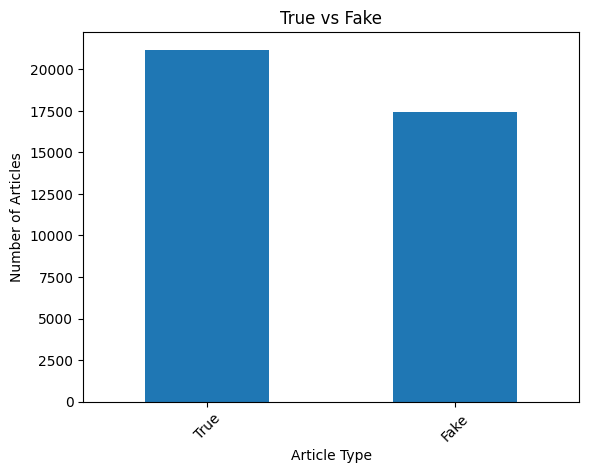

In [22]:
ax = df['is_true'].value_counts().plot(kind = 'bar')
ax.set_xticklabels(['True', 'Fake'], rotation = 45)
plt.xlabel('Article Type')
plt.ylabel('Number of Articles')
plt.title('True vs Fake')
plt.show()

In [23]:
stats = df['words_in_title'].groupby(df['is_true']).mean()
stats

is_true
0    14.520158
1    10.195556
Name: words_in_title, dtype: float64

In [24]:
title_stats = df.groupby('is_true')['words_in_title'].agg(['mean', 'median', 'std'])
title_stats

mean  median       std
is_true                             
0        14.520158    14.0  4.132536
1        10.195556    10.0  1.796046

In [25]:
text_stats = df.groupby('is_true')['words_in_text'].agg(['mean', 'median', 'std', 'min', 'max'])
text_stats

mean  median         std  min   max
is_true                                           
0        424.862101   375.0  356.958059    1  8140
1        381.966786   355.0  272.494881   22  5116

In [26]:
df['words_in_text'].quantile([0.50, 0.75, 0.90, 0.95, 0.99])

0.50     367.0
0.75     509.0
0.90     729.0
0.95     876.0
0.99    1310.0
Name: words_in_text, dtype: float64

### Title Length Insights ðŸ“Š

**Key Finding:** Fake news titles are significantly longer and more variable.

- **Fake news:** 14.5 words (Â± 4.1 std)
- **Real news:** 10.2 words (Â± 1.8 std)
- **Difference:** 42% longer titles for fake news

**Interpretation:**
- Fake news use longer, more sensationalized titles to attract attention
- Real news have shorter, more standardized titles (journalistic style)
- This could be a useful feature for classification

---

## Text Length Analysis

Analyzing the distribution of article text lengths to understand content patterns and determine optimal parameters for text preprocessing.

In [27]:
print("=" * 60)
print("TEXT LENGTH DISTRIBUTION ANALYSIS")
print("=" * 60)

q99 = df['words_in_text'].quantile(0.99)
print(f"\n99th percentile: {q99:.0f} words")
print(f"Articles beyond 99th percentile: {len(df[df['words_in_text'] > q99])} ({len(df[df['words_in_text'] > q99])/len(df)*100:.1f}%)")

fake_median = df[df['is_true'] == 0]['words_in_text'].median()
real_median = df[df['is_true'] == 1]['words_in_text'].median()

print(f"\nFake news median: {fake_median:.0f} words")
print(f"Real news median: {real_median:.0f} words")
print(f"Difference: {abs(fake_median - real_median):.0f} words ({abs(fake_median - real_median)/real_median*100:.1f}%)")

TEXT LENGTH DISTRIBUTION ANALYSIS

99th percentile: 1310 words
Articles beyond 99th percentile: 385 (1.0%)

Fake news median: 375 words
Real news median: 355 words
Difference: 20 words (5.6%)


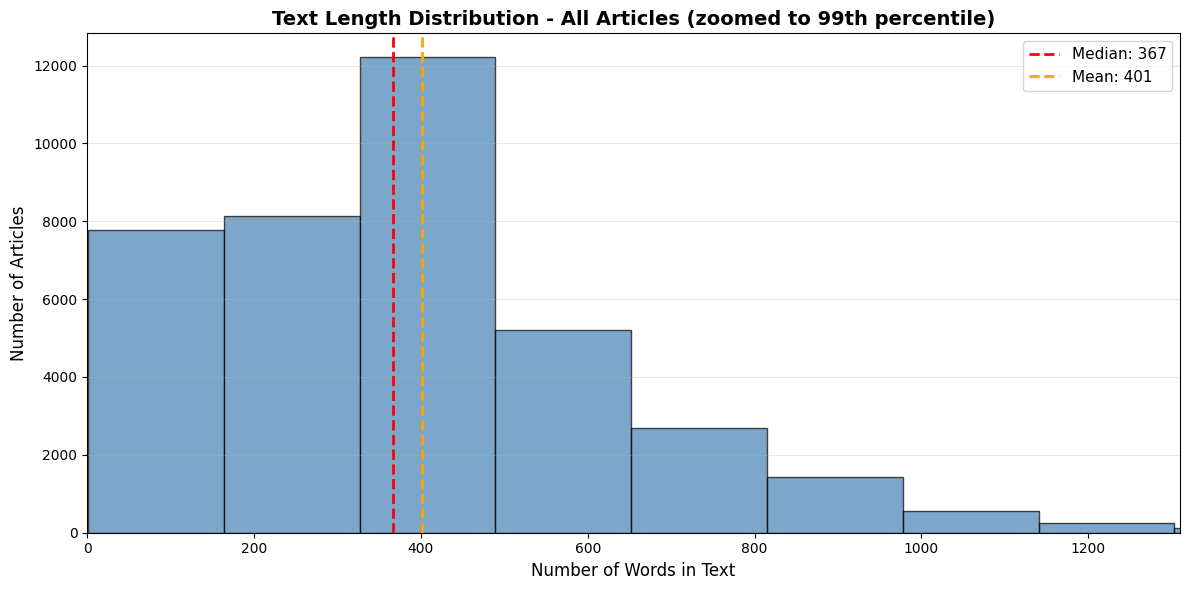

In [28]:
plt.figure(figsize = (12, 6))
plt.hist(df['words_in_text'], bins = 50, edgecolor = 'black', alpha = 0.7, color = 'steelblue')
plt.xlabel('Number of Words in Text', fontsize = 12)
plt.ylabel('Number of Articles', fontsize = 12)
plt.title('Text Length Distribution - All Articles (zoomed to 99th percentile)', fontsize = 14, fontweight = 'bold')
plt.axvline(df['words_in_text'].median(), color = 'red', linestyle = '--', linewidth = 2,
            label = f'Median: {df["words_in_text"].median():.0f}')
plt.axvline(df['words_in_text'].mean(), color = 'orange', linestyle = '--', linewidth = 2,
            label = f'Mean: {df["words_in_text"].mean():.0f}')
plt.xlim(0, q99)
plt.legend(fontsize = 11)
plt.grid(axis = 'y', alpha = 0.3)
plt.tight_layout()
plt.show()

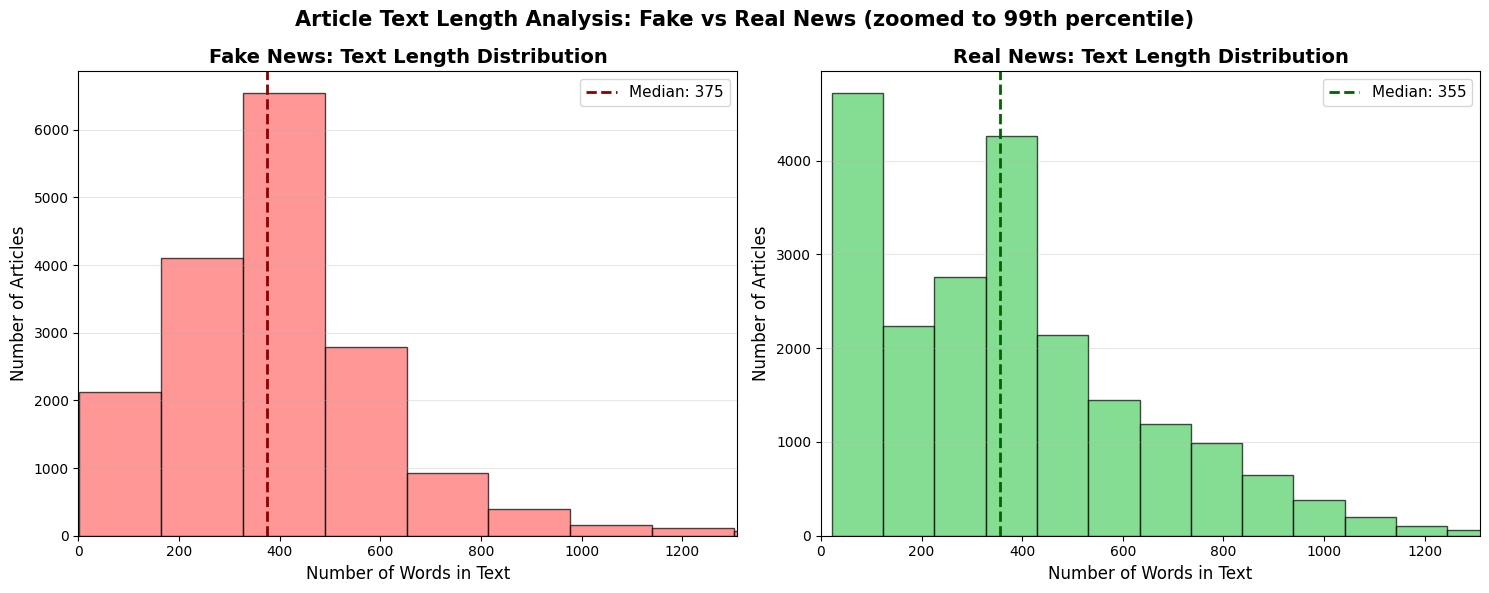

In [29]:
fig, axes = plt.subplots(1, 2, figsize = (15, 6))

axes[0].hist(df[df['is_true'] == 0]['words_in_text'], bins = 50, edgecolor = 'black', alpha = 0.7, color = '#ff6b6b')
axes[0].set_xlabel('Number of Words in Text', fontsize = 12)
axes[0].set_ylabel('Number of Articles', fontsize = 12)
axes[0].set_title('Fake News: Text Length Distribution', fontsize = 14, fontweight = 'bold')
axes[0].axvline(fake_median, color = 'darkred', linestyle = '--', linewidth = 2,
                label = f'Median: {fake_median:.0f}')
axes[0].set_xlim(0, q99)
axes[0].legend(fontsize = 11)
axes[0].grid(axis = 'y', alpha = 0.3)

axes[1].hist(df[df['is_true'] == 1]['words_in_text'], bins = 50, edgecolor = 'black', alpha = 0.7, color = '#51cf66')
axes[1].set_xlabel('Number of Words in Text', fontsize = 12)
axes[1].set_ylabel('Number of Articles', fontsize = 12)
axes[1].set_title('Real News: Text Length Distribution', fontsize = 14, fontweight = 'bold')
axes[1].axvline(real_median, color = 'darkgreen', linestyle = '--', linewidth = 2,
                label = f'Median: {real_median:.0f}')
axes[1].set_xlim(0, q99)
axes[1].legend(fontsize = 11)
axes[1].grid(axis = 'y', alpha = 0.3)

plt.suptitle('Article Text Length Analysis: Fake vs Real News (zoomed to 99th percentile)', fontsize = 15, fontweight = 'bold')
plt.tight_layout()
plt.show()

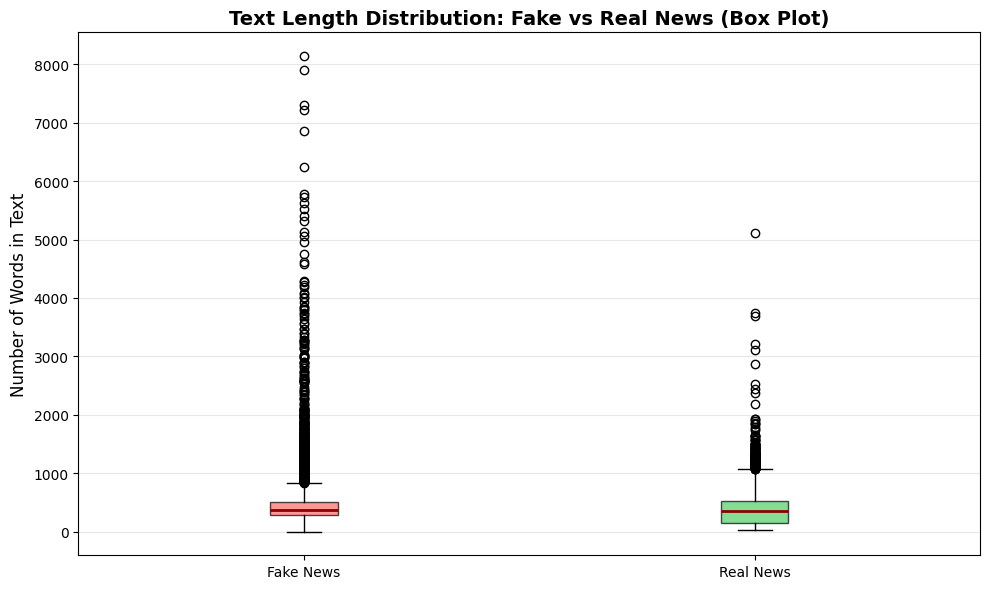

In [30]:
plt.figure(figsize = (10, 6))
box_data = [df[df['is_true'] == 0]['words_in_text'],
            df[df['is_true'] == 1]['words_in_text']]
bp = plt.boxplot(box_data, tick_labels = ['Fake News', 'Real News'], patch_artist = True)

bp['boxes'][0].set_facecolor('#ff6b6b')
bp['boxes'][0].set_alpha(0.7)
bp['boxes'][1].set_facecolor('#51cf66')
bp['boxes'][1].set_alpha(0.7)

for median in bp['medians']:
    median.set_color('darkred')
    median.set_linewidth(2)

plt.ylabel('Number of Words in Text', fontsize = 12)
plt.title('Text Length Distribution: Fake vs Real News (Box Plot)', fontsize = 14, fontweight = 'bold')
plt.grid(axis = 'y', alpha = 0.3)
plt.tight_layout()
plt.show()

In [31]:
print("=" * 60)
print("SAMPLE ARTICLES INSPECTION")
print("=" * 60)

print("\n[FAKE NEWS SAMPLE]")
fake_sample = df[df['is_true'] == 0].sample(1).iloc[0]
print(f"Title: {fake_sample['title']}")
print(f"Text preview (first 300 chars):\n{fake_sample['text'][:100]}...")
print(f"Length: {fake_sample['words_in_text']} words")

print("\n" + "=" * 60)

print("\n[REAL NEWS SAMPLE]")
real_sample = df[df['is_true'] == 1].sample(1).iloc[0]
print(f"Title: {real_sample['title']}")
print(f"Text preview (first 300 chars):\n{real_sample['text'][:100]}...")
print(f"Length: {real_sample['words_in_text']} words")

SAMPLE ARTICLES INSPECTION

[FAKE NEWS SAMPLE]
Title: GOP Rep Dave Brat HUMILIATES MSNBC Host Craig Melvin Over Liberal Media Biasâ€¦Makes Melvin Wish He Never Interviewed Him [VIDEO]
Text preview (first 300 chars):
Republican Congressman David Brat wasn t sitting back and waiting for MSNBC host Craig Melvin to att...
Length: 263 words


[REAL NEWS SAMPLE]
Title: Senator urges U.S. airlines to cap fares for people fleeing Maria
Text preview (first 300 chars):
WASHINGTON (Reuters) - U.S. Senator Bill Nelson sent letters to the chief executives of 10 major U.S...
Length: 91 words


---

## Key Findings & Recommendation

### 1. Dataset Quality âœ…
- **High quality dataset** with no missing values
- Successfully cleaned from 44,898 to 38,658 unique articles
- **Well-balanced:** ~50/50 split between fake and real news
- Ready for preprocessing

### 2. Distinguishing Characteristics

#### Fake News Pattern:
- **Longer titles:** 14.5 words vs 10.2 (42% longer)
- **More variable titles:** Higher standard deviation (4.1 vs 1.8)
- Likely more sensationalized language

#### Real News Pattern:
- **Shorter, standardized titles:** Consistent with journalistic style
- **More uniform structure:** Lower variability in title length

### 3. Text Length Distribution
- **Median text length:** 375 words (fake) vs 355 words (real)
- **99th percentile:** 1310 words
- **Majority of articles:** Between 200-800 words
- **Outliers exist:** Some articles > 2000 words

## Dataset Summary

| Metric                      | Value      |
| ------                      | -----      |
| Total Articles              | 38,658     |
| Fake News                   | ~19,329    |
| Real News                   | ~19,329    |
| Avg Title Length (Fake)     | 14.5 words |
| Avg Title Length (Real)     | 10.2 words |
| 99th Percentile Text Length | 1310 words |
| Missing Values              | 0          |
| Duplicates Removed          | 5,793      |

**Status:** âœ… Dataset is clean and ready for preprocessing

In [32]:
print('Saving merged dataset')
df.to_csv('merged_dataset.csv', index = False)

Saving merged dataset
